In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from IPython.display import clear_output

from sklearn.metrics import confusion_matrix, auc, roc_curve
import itertools
import yaml
import os
import numpy as np
from statistics import mean
from datetime import datetime, timedelta
import time
from sklearn.metrics import precision_recall_curve, auc
import os
import sys
pd.options.display.max_rows = 999
pd.set_option('display.float_format', '{:.4f}'.format)


In [2]:
root_dir = os.path.abspath(os.path.join(os.path.dirname('see_all_expewriments.ipynb'), '..'))
os.chdir(root_dir)
sys.path.insert(0, os.path.join(root_dir, 'src'))

In [3]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y plotea la matriz de confusión.
    La normalización se puede aplicar configurando `normalize=True`.
    """
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()

In [4]:
with open('configs/project_config.yml', 'r') as archivo:
    config = yaml.safe_load(archivo)

initial_wallet_value = config['start_money']


In [5]:
iteration = '1'
root_path = f'./backbone/data/backtest/experiments/{iteration}'
# root_path = 'C:/Users/SaidJ/OneDrive/Documentos/projects/forex_ml_bot/experiments 20240623'


path = 'Mode_train-Model_gradient_boosting-TrainWw_11520-TrainPd_24-TradStgy_ml_strategy-PerFwTg_8-SL_15-RR_3-CloseTime_True-TS_False_opt'
orders = pd.read_csv(os.path.join(root_path, path, 'orders.csv'))
wallet = pd.read_csv(os.path.join(root_path, path, 'wallet.csv'))


In [6]:
orders

,id,ticker,operation_type,open_time,close_time,open_price,last_price,close_price,profit,stop_loss,take_profit,units,profit_in_pips,comment
0,b448eeec-3ee8-11ef-918f-f7a510197866,XAUUSD,OperationType.BUY,2023-01-06 21:00:00,2023-01-06 22:00:00,1868.9200,1868.9200,1868.7700,-10.0500,1868.7700,1869.3700,67,-0.1500,ClosePositionType.STOP_LOSS
1,c054398e-3ee8-11ef-8f54-f7a510197866,XAUUSD,OperationType.SELL,2023-01-26 18:00:00,2023-01-26 19:00:00,1926.0100,1926.0100,1925.5600,29.7000,1926.1600,1925.5600,66,0.4500,ClosePositionType.TAKE_PROFIT
2,c067f5b8-3ee8-11ef-a10d-f7a510197866,XAUUSD,OperationType.SELL,2023-01-26 20:00:00,2023-01-26 21:00:00,1929.7500,1929.7500,1929.3000,30.6000,1929.9000,1929.3000,68,0.4500,ClosePositionType.TAKE_PROFIT
3,c49a1f5b-3ee8-11ef-9634-f7a510197866,XAUUSD,OperationType.SELL,2023-02-02 19:00:00,2023-02-02 20:00:00,1912.1600,1912.1600,1912.3100,-10.5000,1912.3100,1911.7100,70,-0.1500,ClosePositionType.STOP_LOSS
4,c4c31b61-3ee8-11ef-ba07-f7a510197866,XAUUSD,OperationType.SELL,2023-02-02 22:00:00,2023-02-02 23:00:00,1912.8100,1912.8100,1912.9600,-10.3500,1912.9600,1912.3600,69,-0.1500,ClosePositionType.STOP_LOSS
5,cf5b1a94-3ee8-11ef-b139-f7a510197866,XAUUSD,OperationType.BUY,2023-02-17 20:00:00,2023-02-17 21:00:00,1842.1700,1842.1700,1842.0200,-10.3500,1842.0200,1842.6200,69,-0.1500,ClosePositionType.STOP_LOSS
6,cf75a987-3ee8-11ef-8c35-f7a510197866,XAUUSD,OperationType.BUY,2023-02-17 22:00:00,2023-02-17 23:00:00,1841.8800,1841.8800,1841.7300,-10.2000,1841.7300,1842.3300,68,-0.1500,ClosePositionType.STOP_LOSS
7,d4b49107-3ee8-11ef-9fe9-f7a510197866,XAUUSD,OperationType.BUY,2023-02-27 20:00:00,2023-02-27 21:00:00,1818.8500,1818.8500,1818.7000,-10.0500,1818.7000,1819.3000,67,-0.1500,ClosePositionType.STOP_LOSS
8,d4cb5d93-3ee8-11ef-b4ec-f7a510197866,XAUUSD,OperationType.BUY,2023-02-27 22:00:00,2023-02-27 23:00:00,1817.2500,1817.2500,1817.1000,-10.0500,1817.1000,1817.7000,67,-0.1500,ClosePositionType.STOP_LOSS
9,d4de0cca-3ee8-11ef-b4f4-f7a510197866,XAUUSD,OperationType.BUY,2023-02-28 01:00:00,2023-02-28 02:00:00,1817.1200,1817.1200,1817.5700,29.7000,1816.9700,1817.5700,66,0.4500,ClosePositionType.TAKE_PROFIT


In [7]:
orders = orders.sort_values(by='close_time')

# Cantidad de compras y ventas

In [8]:
orders.operation_type.value_counts()

operation_type
OperationType.SELL    48
OperationType.BUY     26
Name: count, dtype: int64

# Compras que salieron bien

In [9]:
orders[(orders['operation_type']=='OperationType.BUY') & (orders['profit']>0)].shape[0] / orders[(orders['operation_type']=='OperationType.BUY')].shape[0] 

0.38461538461538464

# Ventas que salieron bien

In [10]:
orders[(orders['operation_type']=='OperationType.SELL') & (orders['profit']>0)].shape[0] / orders[(orders['operation_type']=='OperationType.SELL')].shape[0] 

0.5208333333333334

# Cierres por SL y TP

In [11]:
orders.comment.value_counts()

comment
ClosePositionType.STOP_LOSS      39
ClosePositionType.TAKE_PROFIT    35
Name: count, dtype: int64

In [12]:
# orders[(orders['comment']=='ClosePositionType.DAYS') & (orders['profit']>=0)].shape[0] / orders[(orders['comment']=='ClosePositionType.DAYS')].shape[0]

# Cierres por SL que terminaron positivos

In [13]:
print(orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['profit']>=0)].shape[0])
orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['profit']>=0)].shape[0] / orders[(orders['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0


0.0

# Cierres por SL en que se minimizaron las perdidas

In [14]:
print(orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['last_price']!=orders['open_price'])].shape[0])
orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['last_price']!=orders['open_price'])].shape[0] / orders[(orders['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0


0.0

# Desempenio por ticker

In [15]:
orders_by_ticker = orders.groupby('ticker').agg(
    positivas=('profit', lambda x: (x > 0).sum()),
    negativas=('profit', lambda x: (x < 0).sum()),
    profit=('profit', lambda x: (x).sum()),
).reset_index()

orders_by_ticker['perc'] = (orders_by_ticker['positivas'] / (orders_by_ticker['positivas'] + orders_by_ticker['negativas'])) * 100
orders_by_ticker.sort_values(by='perc', ascending=False)

,ticker,positivas,negativas,profit,perc
0,XAUUSD,35,39,902.2500,47.2973


# Rendimiento por mes

In [16]:
orders_per_month = orders[['close_time','profit', 'comment']].copy()
orders_per_month['close_time'] = pd.to_datetime(orders_per_month['close_time'])
orders_per_month['year'] = orders_per_month['close_time'].dt.year
orders_per_month['month'] = orders_per_month['close_time'].dt.month
orders_per_month['day'] = orders_per_month['close_time'].dt.day


orders_per_month_gb = orders_per_month.groupby(by=['year','month']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'year':[2023], 'month':[0],'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'].shift(1))

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops'])

orders_per_month_gb[[
    'year', 
    'month', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

,year,month,amount_ops,take_profit,stop_loss,good_ops,bad_ops,perc_good_ops,max_profit,profit_sum,profit_cumsum,perc_change
0,2023,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1000.0000,1000.0000,NaN
0,2023,1,3,2.0000,1.0000,2.0000,1.0000,0.6670,30.6000,50.2500,1050.2500,0.0500
1,2023,2,8,2.0000,6.0000,2.0000,6.0000,0.2500,30.6000,-1.2000,1049.0500,-0.0010
2,2023,3,6,3.0000,3.0000,3.0000,3.0000,0.5000,32.4000,63.4500,1112.5000,0.0600
3,2023,4,12,8.0000,4.0000,8.0000,4.0000,0.6670,39.6000,241.0500,1353.5500,0.2170
4,2023,5,2,1.0000,1.0000,1.0000,1.0000,0.5000,40.5000,26.5500,1380.1000,0.0200
5,2023,6,7,6.0000,1.0000,6.0000,1.0000,0.8570,47.7000,252.1500,1632.2500,0.1830
6,2023,7,4,1.0000,3.0000,1.0000,3.0000,0.2500,47.7000,-0.9000,1631.3500,-0.0010
7,2023,8,3,0.0000,3.0000,0.0000,3.0000,0.0000,-16.0500,-48.6000,1582.7500,-0.0300
8,2023,9,7,6.0000,1.0000,6.0000,1.0000,0.8570,54.4500,288.6000,1871.3500,0.1820


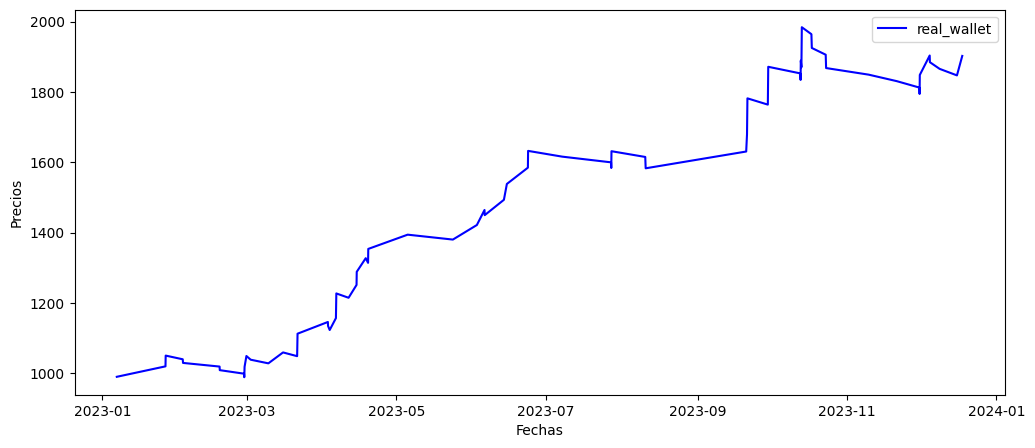

In [17]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 5))

# Datos de ejemplo
x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea
# Crear una figura y ejes
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='real_wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [18]:
orders_per_month_gb.perc_change.mean()

0.057999999999999996

In [19]:
orders_per_month_gb.perc_change.std()

0.08618268123848634

In [20]:
change_percent = orders_per_month_gb.perc_change.reset_index().copy().drop(columns='index')
change_percent.fillna(0, inplace=True)

# Inicializar el valor de partida
initial_value = 3000

# Crear una columna para la suma acumulada
change_percent['cumulative_sum'] = initial_value

# Calcular la suma acumulada basada en los porcentajes
for i in range(1, len(change_percent)):
    change_percent.loc[i, 'cumulative_sum'] = change_percent.loc[i-1, 'cumulative_sum'] * (1 + change_percent.loc[i, 'perc_change'])

change_percent

,perc_change,cumulative_sum
0,0.0000,3000.0000
1,0.0500,3150.0000
2,-0.0010,3146.8500
3,0.0600,3335.6610
4,0.2170,4059.4994
5,0.0200,4140.6894
6,0.1830,4898.4356
7,-0.0010,4893.5372
8,-0.0300,4746.7310
9,0.1820,5610.6361


# Rendimiento por dia

In [21]:
orders_per_month_gb = orders_per_month.groupby(by=['year','month', 'day']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'year':[2023], 'month':[0], 'day':[0], 'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'])

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops']) * 100

orders_per_month_gb = orders_per_month_gb[[
    'year', 
    'month', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

orders_per_month_gb[orders_per_month_gb['month']==1]

,year,month,amount_ops,take_profit,stop_loss,good_ops,bad_ops,perc_good_ops,max_profit,profit_sum,profit_cumsum,perc_change
0,2023,1,1,0.0000,1.0000,0.0000,1.0000,0.0000,-10.0500,-10.0500,989.9500,-0.0100
1,2023,1,2,2.0000,0.0000,2.0000,0.0000,100.0000,30.6000,60.3000,1050.2500,0.0570


In [22]:
# ticker = 'EURUSD'
# date_from = datetime(2022,1,1)
# date_to = date_from + timedelta(days=30)

# while date_to < datetime(2024,1,1):
#     date_from_str = date_from.strftime('%Y-%m-%d')
#     date_to_str = date_to.strftime('%Y-%m-%d')

#     historical_prices = pd.read_csv(f'./backbone/data/backtest/symbols/{ticker}.csv')
    
#     historical_prices = historical_prices[
#         (historical_prices['Date']>date_from_str)
#         & (historical_prices['Date']<date_to_str)
#     ]
    
#     plt.figure(figsize=(14, 7))
#     plt.plot(historical_prices['Date'], historical_prices['Close'], label=f'{ticker} Price', color='blue')
    
#     # Añadir las operaciones de compra y venta
#     buy_trades = orders[
#         (orders['operation_type']=='OperationType.BUY') 
#         & (orders['close_time']>date_from_str)
#         & (orders['close_time']<date_to_str)
#         & (orders['ticker']==ticker)
#     ]
#     sell_trades = orders[
#         (orders['operation_type']=='OperationType.SELL') 
#         & (orders['close_time']>date_from_str)
#         & (orders['close_time']<date_to_str)
#         & (orders['ticker']==ticker)
#     ]
    
#     # Graficar las operaciones de compra
#     plt.scatter(buy_trades['open_time'], buy_trades['open_price'], color='green', marker='^', s=100, label='Buy Open')
#     plt.scatter(buy_trades['close_time'], buy_trades['close_price'], color='lime', marker='o', s=100, label='Buy Close')
    
#     # Graficar las operaciones de venta
#     plt.scatter(sell_trades['open_time'], sell_trades['open_price'], color='red', marker='v', s=100, label='Sell Open')
#     plt.scatter(sell_trades['close_time'], sell_trades['close_price'], color='orange', marker='o', s=100, label='Sell Close')
    
#     # Añadir etiquetas y leyenda
#     plt.xlabel('Date')
#     plt.ylabel('Price')
#     plt.title(f'{ticker} Price with Buy/Sell Trades')
#     plt.legend()
    
#     # Mostrar el gráfico
#     plt.show()
    
#     print(date_from_str, date_to_str)
   
#     a = input()
    
#     clear_output(wait=True)

#     date_from += timedelta(days=7)
#     date_to = date_from + timedelta(days=15)


In [23]:
orders_per_month = orders[['close_time','comment', 'ticker', 'profit']].copy()
orders_per_month['close_time'] = pd.to_datetime(orders_per_month['close_time'])
orders_per_month['year'] = orders_per_month['close_time'].dt.year
orders_per_month['month'] = orders_per_month['close_time'].dt.month
orders_per_month['day'] = orders_per_month['close_time'].dt.day

orders_per_month_gb = orders_per_month.groupby(by=['year','month', 'day']).agg(
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit=('profit', lambda x: (x).sum()),

)

orders_per_month_gb['tp_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['take_profit'].cumsum()
orders_per_month_gb['sl_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['stop_loss'].cumsum()
orders_per_month_gb['profit_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['profit'].cumsum()
orders_per_month_gb

take_profit  stop_loss   profit  tp_cumsum  sl_cumsum  \
year month day                                                          
2023 1     6              0          1 -10.0500          0          1   
           26             2          0  60.3000          2          1   
     2     2              0          2 -20.8500          0          2   
           17             0          2 -20.5500          0          4   
           27             0          2 -20.1000          0          6   
           28             2          0  60.3000          2          6   
     3     2              0          1 -10.5000          0          1   
           9              0          1 -10.3500          0          2   
           15             1          0  31.0500          1          2   
           21             2          1  53.2500          3          3   
     4     3              1          2  10.5000          1          2   
           6              3          0 103.9500          4          2   
           11             0          1 -12.3000          4          3   
           14             2          0  73.8000          6          3   
           18             1          0  38.7000          7          3   
           19             1          1  26.4000          8          4   
     5     5              1          0  40.5000          1          0   
           24             0          1 -13.9500          1          1   
     6     2              1          0  41.4000          1          0   
           6              1          1  28.0500          2          1   
           13             1          0  43.6500          3          1   
           15             1          0  45.0000          4          1   
           23             2          0  94.0500          6          1   
     7     7              0          1 -16.3500          0          1   
           27             1          2  15.4500          1          3   
     8     10             0          3 -48.6000          0          3   
     9     20             1          0  47.7000          1          0   
           21             3          0 151.2000          4          0   
           29             2          1  89.7000          6          1   
     10    12             0          1 -18.7500          0          1   
           13             3          2 131.2500          3          3   
           17             0          3 -58.9500          3          6   
           23             0          3 -57.1500          3          9   
     11    9              0          1 -18.7500          0          1   
           21             0          1 -18.4500          0          2   
           30             1          2  17.5500          1          4   
     12    4              1          1  36.3000          1          1   
           8              0          1 -18.9000          1          2   
           15             0          1 -18.6000          1          3   
           18             1          0  55.3500          2          3   

                profit_cumsum  
year month day                 
2023 1     6         -10.0500  
           26         50.2500  
     2     2         -20.8500  
           17        -41.4000  
           27        -61.5000  
           28         -1.2000  
     3     2         -10.5000  
           9         -20.8500  
           15         10.2000  
           21         63.4500  
     4     3          10.5000  
           6         114.4500  
           11        102.1500  
           14        175.9500  
           18        214.6500  
           19        241.0500  
     5     5          40.5000  
           24         26.5500  
     6     2          41.4000  
           6          69.4500  
           13        113.1000  
           15        158.1000  
           23        252.1500  
     7     7         -16.3500  
           27         -0.9000  
     8     10        -48.6000  
     9     20         47.7000  
           21        

# Que hubiera pasado si no se operaba con algunos tickers?

In [24]:
tickers_permitidos = orders_by_ticker[orders_by_ticker['profit']>0].ticker.unique()
print(tickers_permitidos)

# tickers_permitidos = [
#     'EURUSD', 
#     'GBPUSD', 
#     'USDJPY', 
#     # 'USDCAD', 
#     'AUDUSD', 
#     'USDCHF'
# ]

orders_min = orders_per_month[orders_per_month['ticker'].isin(tickers_permitidos)].copy().reset_index()

['XAUUSD']


# Rendimiento por mes

In [25]:
orders_per_month_gb = orders_min.groupby(by=['year','month', 'day']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'year':[2023], 'month':[0], 'day':[0], 'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'])

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops']) * 100

orders_per_month_gb = orders_per_month_gb[[
    'year', 
    'month', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

orders_per_month_gb[orders_per_month_gb['month']==2]

,year,month,amount_ops,take_profit,stop_loss,good_ops,bad_ops,perc_good_ops,max_profit,profit_sum,profit_cumsum,perc_change
2,2023,2,2,0.0000,2.0000,0.0000,2.0000,0.0000,-10.3500,-20.8500,1029.4000,-0.0200
3,2023,2,2,0.0000,2.0000,0.0000,2.0000,0.0000,-10.2000,-20.5500,1008.8500,-0.0200
4,2023,2,2,0.0000,2.0000,0.0000,2.0000,0.0000,-10.0500,-20.1000,988.7500,-0.0200
5,2023,2,2,2.0000,0.0000,2.0000,0.0000,100.0000,30.6000,60.3000,1049.0500,0.0570


In [26]:
orders_min['wallet'] = orders_min['profit']
orders_min.loc[0, 'wallet'] = initial_wallet_value + orders_min.iloc[0]['profit']
orders_min['wallet'] = orders_min['wallet'].cumsum()

In [27]:
orders_by_ticker = orders_min.groupby('ticker').agg(
    positivas=('profit', lambda x: (x > 0).sum()),
    negativas=('profit', lambda x: (x < 0).sum()),
    profit=('profit', lambda x: (x).sum()),
).reset_index()

orders_by_ticker['perc'] = orders_by_ticker['positivas'] / (orders_by_ticker['positivas'] + orders_by_ticker['negativas'])
orders_by_ticker.sort_values(by='perc', ascending=False)

,ticker,positivas,negativas,profit,perc
0,XAUUSD,35,39,902.2500,0.4730


In [28]:
orders_min[(orders_min['comment']=='ClosePositionType.STOP_LOSS') & (orders_min['profit']>=0)].shape[0] / orders_min[(orders_min['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0.0

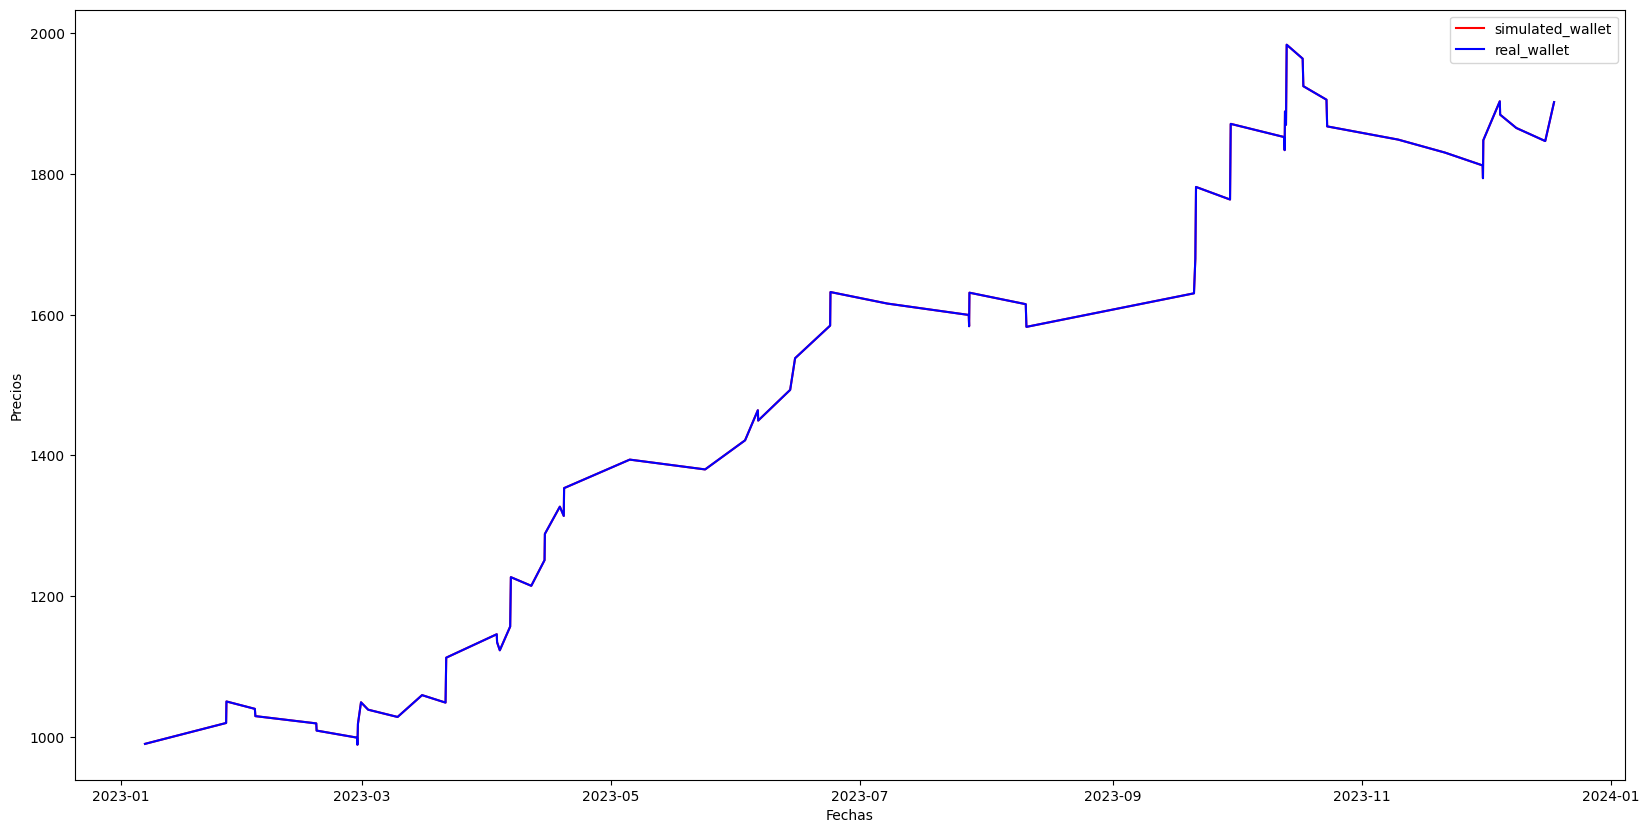

In [29]:
import matplotlib.pyplot as plt
import numpy as np


# Datos de ejemplo
x_wallet = pd.to_datetime(orders_min['close_time'])
y_wallet = orders_min['wallet']  # Datos para la línea
# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='simulated_wallet', color='red')



# Datos de ejemplo
x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea
# Crear una figura y ejes
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='real_wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [30]:
true_values = pd.read_csv(os.path.join(root_path, path, 'trainres.csv'))
predictions = pd.read_csv(os.path.join(root_path, path, 'test_res.csv')).dropna()

In [31]:
predictions

,ticker,date,y_true,y_pred,proba
0,XAUUSD,2023-01-05 18:00:00,0.0000,0.0000,0.5057
1,XAUUSD,2023-01-06 19:00:00,0.0000,0.0000,0.5022
2,XAUUSD,2023-01-06 20:00:00,1.0000,0.0000,0.5003
3,XAUUSD,2023-01-06 21:00:00,1.0000,1.0000,0.5033
4,XAUUSD,2023-01-26 18:00:00,1.0000,1.0000,0.5060
...,...,...,...,...,...
1034,XPDUSD,2023-11-27 20:00:00,0.0000,1.0000,0.5081
1035,XPDUSD,2023-11-27 21:00:00,0.0000,1.0000,0.5042
1036,XPDUSD,2023-11-27 22:00:00,0.0000,1.0000,0.5184
1037,XPDUSD,2023-11-27 23:00:00,1.0000,0.0000,0.5052


In [32]:
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score, classification_report

precision = precision_score(predictions.y_true, predictions.y_pred, average='weighted')
recall = recall_score(predictions.y_true, predictions.y_pred, average='weighted')
f1 = f1_score(predictions.y_true, predictions.y_pred, average='weighted')

print(precision)
print(recall)
print(f1)

0.5501506279918537
0.5409047160731473
0.5436834783939427


              precision    recall  f1-score   support

         0.0       0.62      0.55      0.58       603
         1.0       0.46      0.52      0.49       436

    accuracy                           0.54      1039
   macro avg       0.54      0.54      0.54      1039
weighted avg       0.55      0.54      0.54      1039

Confusion Matrix
[[334 269]
 [208 228]]


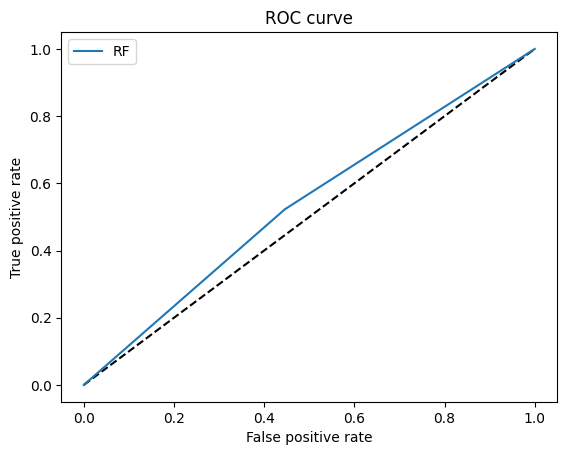

In [33]:
fpr_rf, tpr_rf, _ = roc_curve(predictions['y_true'], predictions['y_pred'])
print(classification_report(predictions['y_true'], predictions['y_pred']))

print("Confusion Matrix")
print(confusion_matrix(predictions['y_true'], predictions['y_pred']))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [34]:
predictions['binary_pred'] = np.where(
    (predictions['y_pred']==0), 
    1 - predictions['proba'], 
    predictions['proba']
)

predictions

,ticker,date,y_true,y_pred,proba,binary_pred
0,XAUUSD,2023-01-05 18:00:00,0.0000,0.0000,0.5057,0.4943
1,XAUUSD,2023-01-06 19:00:00,0.0000,0.0000,0.5022,0.4978
2,XAUUSD,2023-01-06 20:00:00,1.0000,0.0000,0.5003,0.4997
3,XAUUSD,2023-01-06 21:00:00,1.0000,1.0000,0.5033,0.5033
4,XAUUSD,2023-01-26 18:00:00,1.0000,1.0000,0.5060,0.5060
...,...,...,...,...,...,...
1034,XPDUSD,2023-11-27 20:00:00,0.0000,1.0000,0.5081,0.5081
1035,XPDUSD,2023-11-27 21:00:00,0.0000,1.0000,0.5042,0.5042
1036,XPDUSD,2023-11-27 22:00:00,0.0000,1.0000,0.5184,0.5184
1037,XPDUSD,2023-11-27 23:00:00,1.0000,0.0000,0.5052,0.4948


<Axes: >

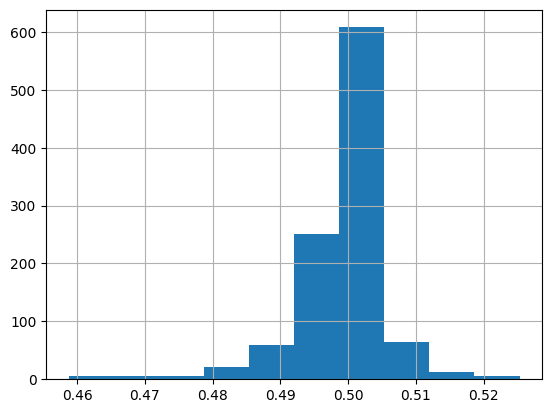

In [35]:
predictions.binary_pred.hist()

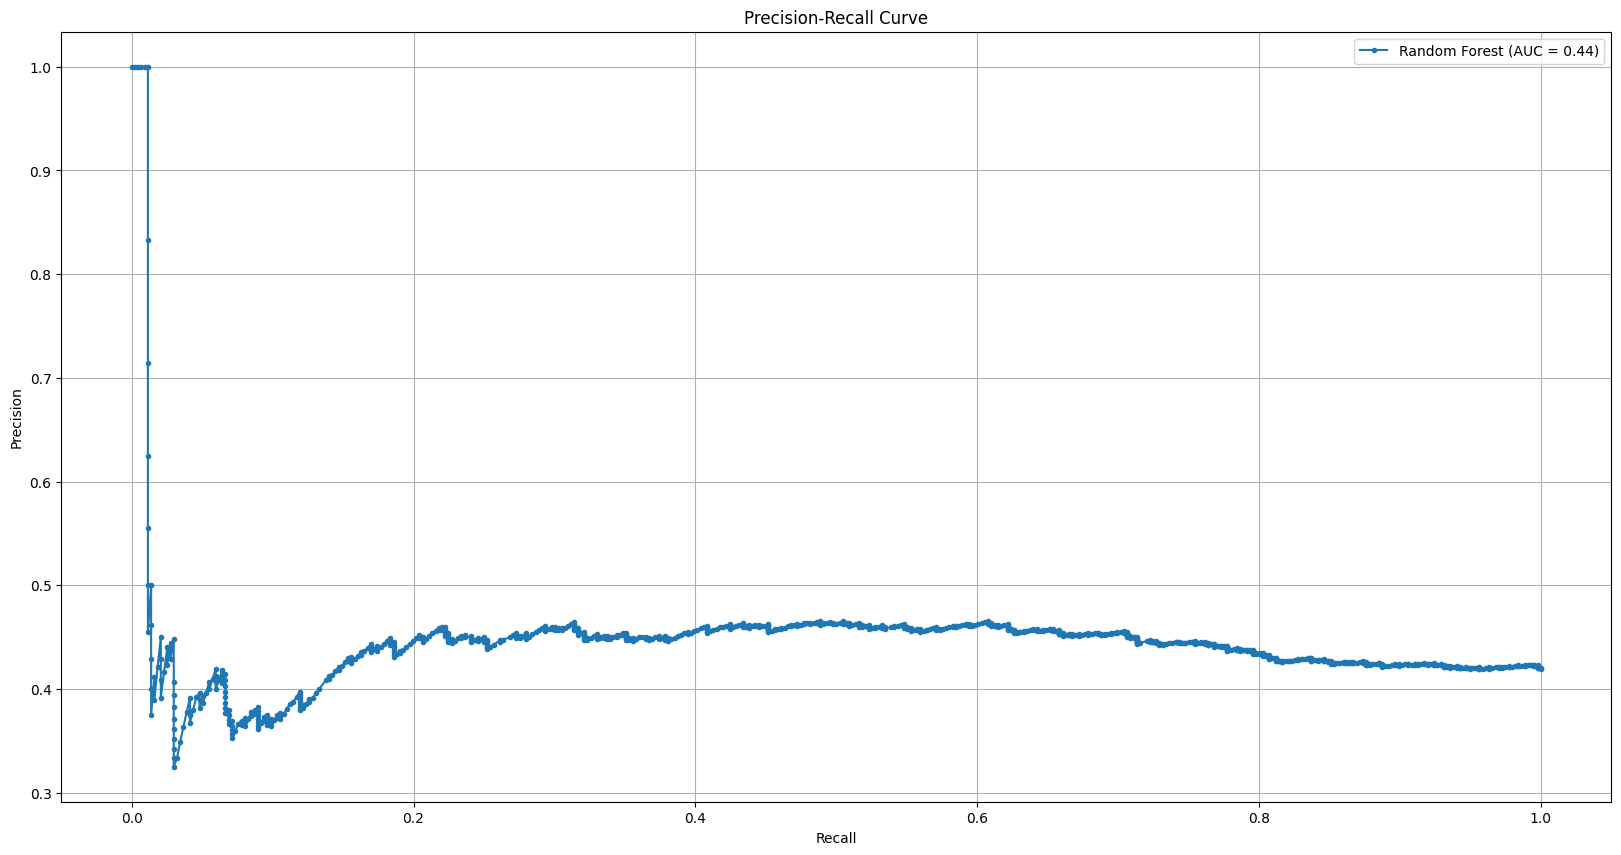

In [36]:
precision, recall, thresholds = precision_recall_curve(predictions['y_true'], predictions['binary_pred'])
pr_auc = auc(recall, precision)
# Plotear la curva de precisión/recall
plt.figure(figsize=(20, 10))

plt.plot(recall, precision, marker='.', label=f'Random Forest (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [37]:
import numpy as np
from sklearn.metrics import precision_recall_curve

def find_best_threshold_fbeta(y_true, y_proba, beta=0.01):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    
    # Calcular F-beta scores
    fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)
    
    # Evitar división por cero y resultados nan
    fbeta_scores = np.nan_to_num(fbeta_scores)
    
    # Encontrar el umbral que maximiza el F-beta score
    index = np.argmax(fbeta_scores)
    best_threshold = thresholds[index]
    best_precision = precision[index]
    best_recall = recall[index]
    best_fbeta = np.max(fbeta_scores)
    
    return best_threshold, best_precision, best_recall, best_fbeta



In [38]:
find_best_threshold_fbeta(predictions['y_true'], predictions['binary_pred'], beta=0.2)

(0.4996506560831764,
 0.46572934973637964,
 0.6077981651376146,
 0.46995430052520293)

In [39]:
threshold = 0.45
preds = np.where(
    (predictions['binary_pred']<=threshold),
    0, 
    1
)

print(classification_report(predictions.y_true, preds))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       603
         1.0       0.42      1.00      0.59       436

    accuracy                           0.42      1039
   macro avg       0.21      0.50      0.30      1039
weighted avg       0.18      0.42      0.25      1039



c:\users\saidj\onedrive\documentos\projects\forex_ml_bot\forex_ml_bot\mtvenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\saidj\onedrive\documentos\projects\forex_ml_bot\forex_ml_bot\mtvenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\saidj\onedrive\documentos\projects\forex_ml_bot\forex_ml_bot\mtvenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier

def get_xgboost_feature_importance_from_stacking(pipeline):
    """
    Obtiene la importancia de las características del XGBClassifier dentro de un StackingClassifier.

    Parameters:
    pipeline (Pipeline): Un objeto pipeline de sklearn entrenado que contiene un StackingClassifier.

    Returns:
    dict: Un diccionario donde las claves son los nombres de las características y los valores son su importancia.
    """
    if not isinstance(pipeline, Pipeline):
        raise ValueError("El parámetro debe ser un objeto de tipo Pipeline de sklearn.")

    # Intentar obtener el último estimador del pipeline
    final_estimator = pipeline.named_steps[list(pipeline.named_steps.keys())[-1]]

    # Comprobar si el estimador final es un StackingClassifier
    if not isinstance(final_estimator, StackingClassifier):
        raise ValueError("El estimador final del pipeline no es un StackingClassifier.")
    
    # Obtener el ProbabilityTransformer del stack
    prob_transf = final_estimator.named_estimators_['prob_transf']
    
    # Obtener el modelo XGBClassifier dentro del ProbabilityTransformer
    xgb_model = prob_transf.model
    
    # Comprobar si el XGBClassifier tiene el atributo feature_importances_
    if not hasattr(xgb_model, 'feature_importances_'):
        raise ValueError("El XGBClassifier no tiene el atributo feature_importances_.")

    importances = xgb_model.feature_importances_

    # Obtener los nombres de las características
    first_transformer = pipeline.named_steps[list(pipeline.named_steps.keys())[0]]
    if hasattr(first_transformer, 'get_feature_names_out'):
        feature_names = first_transformer.get_feature_names_out()
    else:
        feature_names = pipeline['preprocessor'].get_feature_names_out()  # Ajustar según el nombre de tu primer paso

    return dict(zip(feature_names, importances))

In [41]:
pipeline_path = os.path.join(root_path, path, 'pipe.pkl')

In [42]:
import joblib

with open(pipeline_path, 'rb') as file:
    pipeline = joblib.load(file)

features = pipeline.named_steps[list(pipeline.named_steps.keys())[-1]].named_estimators_['prob_transf']


In [43]:
names = []
values = []

for k, v in features.items():
    names.append(k)
    values.append(v)

features_df = pd.DataFrame({'feature':names, 'importance':values})
features_df.sort_values(by='importance', ascending=False)


AttributeError: 'ProbabilityTransformer' object has no attribute 'items'

In [ ]:


from sklearn.metrics import precision_score, f1_score, recall_score



tickers = config["tickers"] 
tickers

predictions = predictions.sort_values(by='fecha')
true_values = true_values.sort_values(by='fecha')


# renombro las columnas
column_names = {}
for column in predictions.columns:
    if column != 'fecha':
        column_names[column] = f'{column}_preds'

predictions = predictions.rename(columns=column_names)

column_names = {}
for column in true_values.columns:
    if column != 'fecha':
        column_names[column] = f'{column}_true'

true_values = true_values.rename(columns=column_names)
performance = pd.concat(
    [
        predictions,
        true_values
    ], axis=1, join="inner"
)

recall_list = []
f1_list = []
precision_list = []

for ticker in tickers:
    y_true = performance[performance[f'{ticker}_true'].notna()][f'{ticker}_true']
    y_pred = performance[performance[f'{ticker}_preds'].notna()][f'{ticker}_preds']
    
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # print(classification_report(performance[f'{ticker}_true'], performance[f'{ticker}_preds'], target_names=target_names))
    
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    

# Grafico de velas

In [ ]:
# import plotly.graph_objects as go

# fig = go.Figure(data=[go.Candlestick(x=prices['Date'],
#                 open=prices['Open'],
#                 high=prices['High'],
#                 low=prices['Low'],
#                 close=prices['Close'])])

# fig.update_layout(
#     title=f"{config['ticker']}",
#     yaxis_title=f"{config['ticker']} Stock"
# )

# fig.show()

# Estrategia

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['fecha'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

ax.plot(x_wallet, y_wallet, label='wallet', color='purple')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['date'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc

print('Area bajo la curva: ', auc(wallet.index, wallet['wallet']))

# Datos de ejemplo
x_prices = pd.to_datetime(wallet['date'])
y_prices = wallet['wallet']  # Datos para la línea


# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='Wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


# Modelo

In [ ]:
predictions.sort_values(by='fecha')

In [ ]:
true_values.sort_values(by='fecha')

In [ ]:
accuracy_score(predictions[predictions['YPF'].notna()].YPF, true_values[true_values['YPF'].notna()].YPF)

In [ ]:
threshold_down = 0.5
threshold_up = 0.5

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

In [ ]:
threshold_down = 0.1
threshold_up = 0.9

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

In [ ]:
plt.hist(performance.y_pred, color='lightgreen', ec='black', bins=50)
plt.show()

In [ ]:
buys = buys.rename(columns={''})

In [ ]:
operations = pd.concat([buys[buys['YPF'].notna()], sells[sells['YPF'].notna()]], axis=1, join="inner")[['fecha','YPF']]
operations

In [ ]:
operations['positive'] = np.where(operations['buy']>operations['sell'], 0, 1)
operations['Profit'] = operations['sell'] - operations['buy'] 
operations['positive'].value_counts()